<a href="https://colab.research.google.com/github/Syilun/ML20200716/blob/master/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris() 
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.to_csv('iris.csv', encoding = 'utf-8', index = False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris['data'])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
'''
labels_ndarray of shape (n_samples,)
Labels of each point
'''

df['label'] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [12]:
'''
cluster_centers_ndarray of shape (n_clusters, n_features)
Coordinates of cluster centers.
If the algorithm stops before fully converging (see tol and max_iter),
these will not be consistent with labels_.
'''

cluster.cluster_centers_



array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Text(0.5, 1.0, 'Cluster')

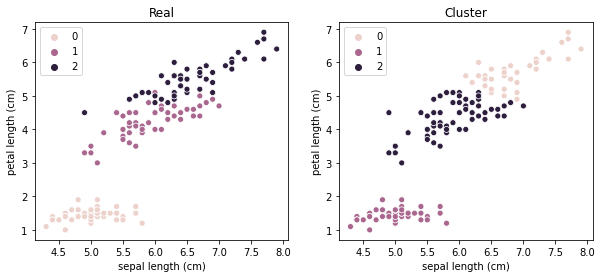

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.figure(figsize=(10, 4)) # 調整寬高 plt.figure(figsize=(寬度inches, 高度inches))



plt.subplot(1, 2, 1) # plt.subplot(總高度, 總寬度, 第幾張[1, 2, 3,...])
sns.scatterplot(df['sepal length (cm)'], df['petal length (cm)'], hue=iris['target'])
plt.title('Real')



plt.subplot(1, 2, 2)
sns.scatterplot(df['sepal length (cm)'], df['petal length (cm)'], hue=cluster.labels_)
plt.title('Cluster')

In [14]:
# 分成兩群試試看
from sklearn.metrics import silhouette_score
for k in range(2, 10):
  test = KMeans(n_clusters=k)
  test.fit(iris['data'])
  s = silhouette_score(iris['data'], test.labels_)
  print('[K]: ', k, '[Score]: ', s)


[K]:  2 [Score]:  0.681046169211746
[K]:  3 [Score]:  0.5528190123564091
[K]:  4 [Score]:  0.4980505049972867
[K]:  5 [Score]:  0.4887488870931048
[K]:  6 [Score]:  0.3648340039670018
[K]:  7 [Score]:  0.3528198099033321
[K]:  8 [Score]:  0.342883980513937
[K]:  9 [Score]:  0.3439103447481878
